### Importing Modules 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


### Loading Dataset

In [10]:
size = 5000
dataframe = pd.read_csv("../../Datasets/"+str(size)+"dataset.csv")
dataframe


,is_malicious,658,2360,2359,613,930,637,623,2363,2364,...,641,578,798,748,640,626,834,734,32,sha
0,0,0.809282,-0.153843,-0.368721,-0.111911,-0.437024,-1.798249,-0.550238,-0.559372,-0.048629,...,-0.939054,0.328024,0.182270,-1.024731,1.562748,-2.371792,0.055191,0.053518,1.056672,d2dbaa97b1977b643f2a4fe99843431cb370de5c254881...
1,0,-0.629186,-0.153843,-0.368721,-0.103857,-0.437024,-1.798249,-0.550238,-0.559372,-0.048629,...,1.064902,-0.033839,0.185003,-0.059724,0.216480,-0.112837,0.054359,0.052702,0.079929,20479d17df1313d1b31909c5a169b378f4a55948023f86...
2,0,-0.629186,0.293131,0.227423,-0.103857,-0.437024,0.556096,-0.550238,-0.559372,-0.048629,...,-0.939054,-0.094726,0.185181,0.635514,0.216480,0.217930,0.049358,0.047683,-0.272413,95ea1b97a64a8ed5e5d9abb692c858c02f5ba384cadc87...
3,0,0.809282,-0.153843,-0.368721,-0.111911,-0.437024,-1.798249,-0.550238,-0.559372,-0.048629,...,-0.939054,0.140489,0.185003,0.069652,0.216480,-0.405646,0.037430,0.035760,0.253349,909a25ce0eab1f7decb892a03bc9930333a12fb011269e...
4,1,0.809282,-0.153843,-0.368721,-0.111911,-0.437024,0.556096,-0.550238,-0.559372,-0.048629,...,-0.939054,0.038765,-0.362467,0.635514,0.216480,-1.114154,-0.014232,-0.015756,-0.410643,648171f8d5d24b8d32de89250d89dba430e38d634330ab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,-2.067653,-0.153521,2.079474,0.242431,-0.437024,0.556096,1.817395,1.263196,-0.047465,...,1.064902,-0.530261,0.184587,-0.439746,1.562748,0.407004,0.056354,0.054710,0.308313,485fb3ac9d471bb615c2fc7890b84cb1107985274ecfde...
4996,1,0.809282,-0.153843,-0.368721,-0.111911,-0.437024,0.556096,-0.550238,-0.559372,-0.048629,...,-0.939054,-0.264479,0.158322,-1.734632,1.562748,-1.114152,0.056948,0.055338,-0.063763,6788807914ee90bc00ac6f6e9e94b049f91f9af372e14f...
4997,0,-0.629186,3.913876,0.268265,0.024994,-0.437024,0.556096,1.817395,-0.559372,-0.048629,...,1.064902,0.051544,0.172747,-3.608843,-1.129788,0.376218,0.052372,0.050695,-0.307993,14133fe8f77245826e1365a33382ee120dc60d16d8bd13...
4998,1,0.809282,-0.153843,-0.368721,-0.111911,1.172047,0.556096,-0.550238,-0.559372,-0.048629,...,-0.939054,-0.163972,0.185181,0.635514,0.216480,-1.114154,0.056948,0.055338,-0.273639,bbc603ceef733139e464e9bf20bc51a56f37ec2142c1b0...


#### Data Analisys

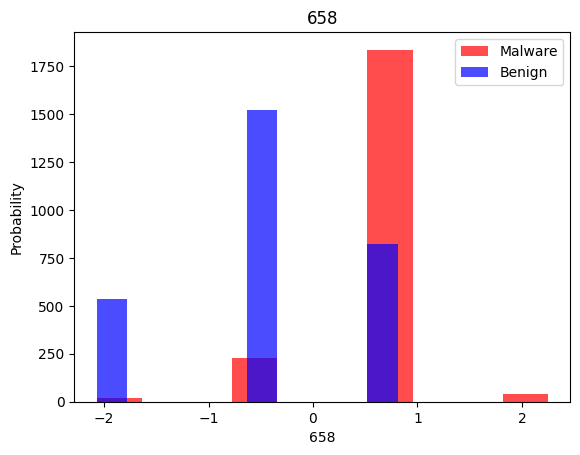

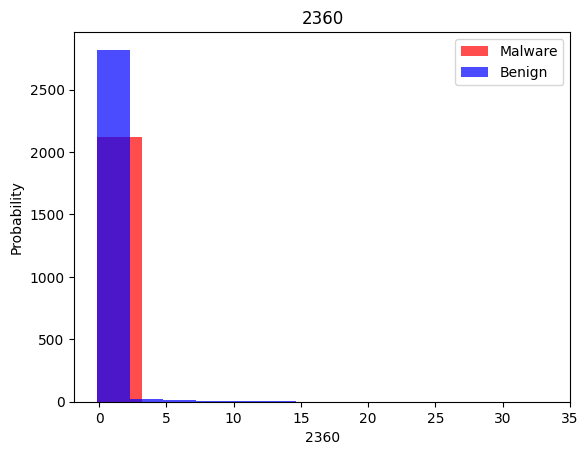

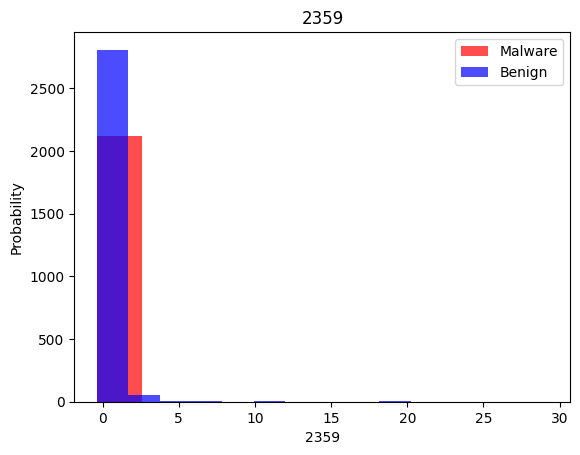

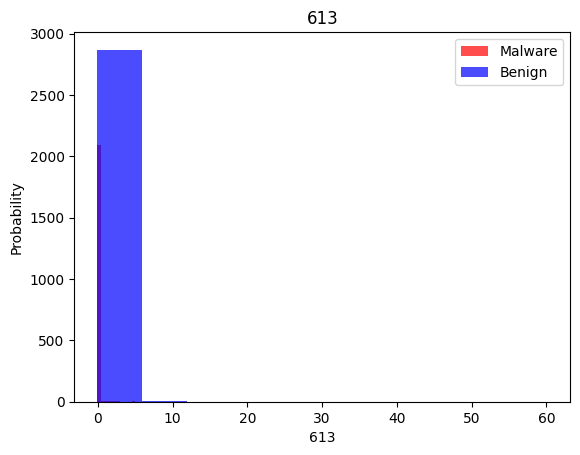

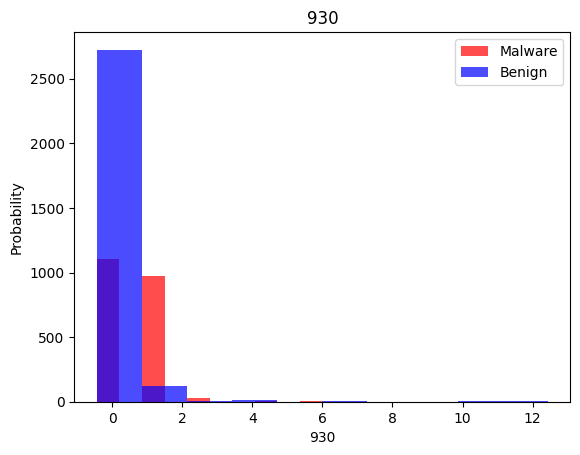

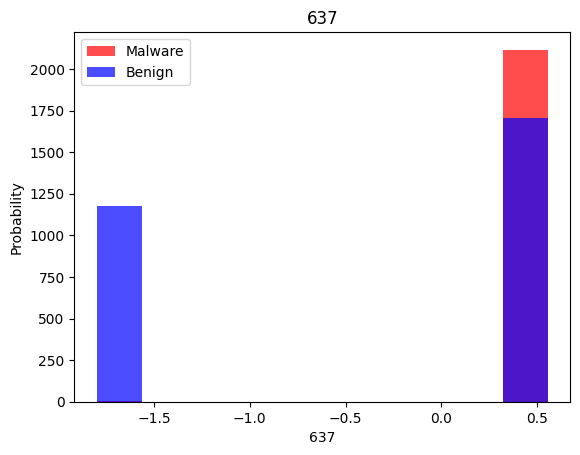

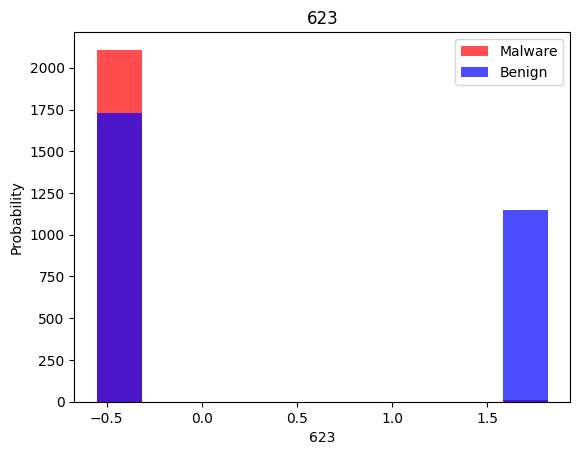

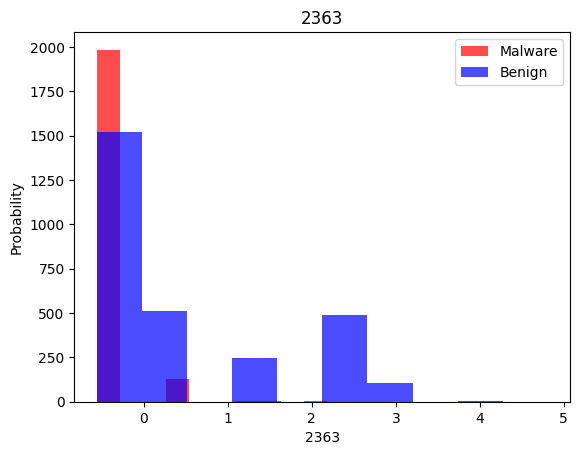

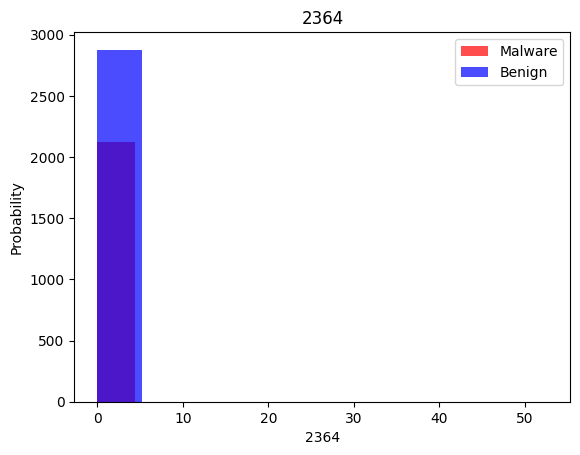

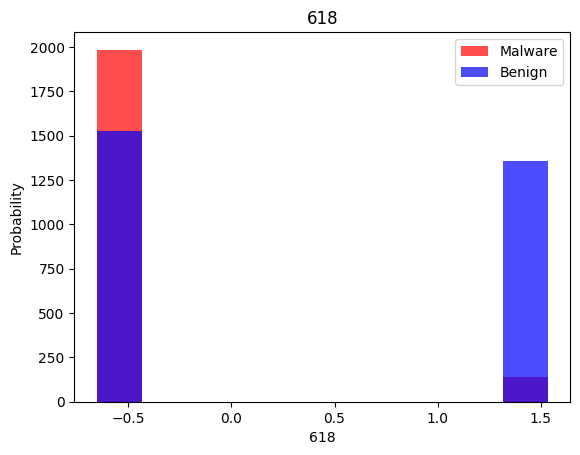

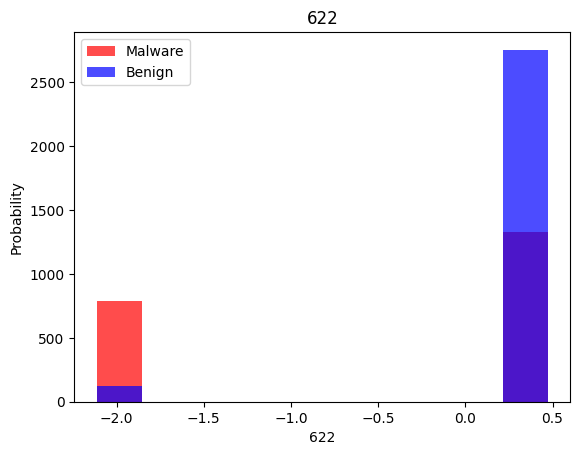

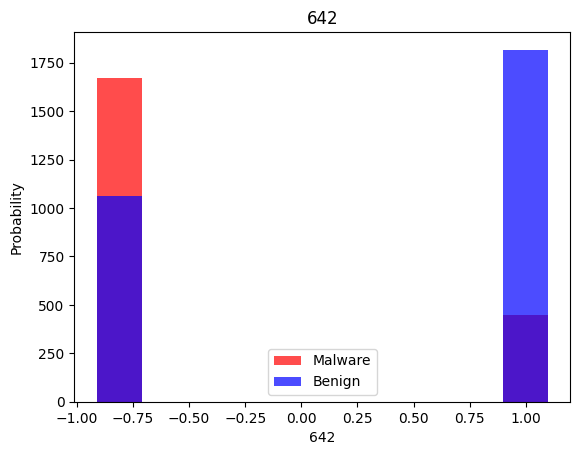

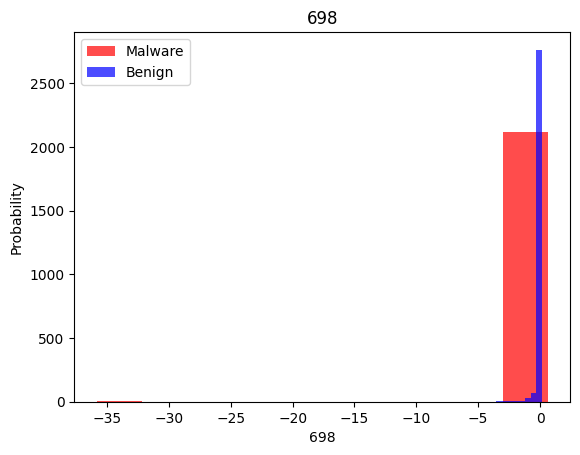

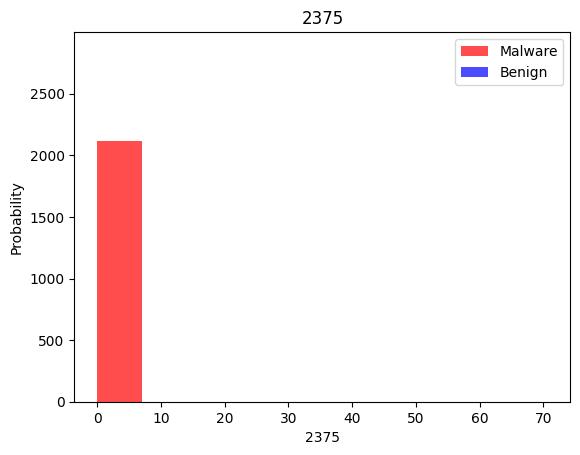

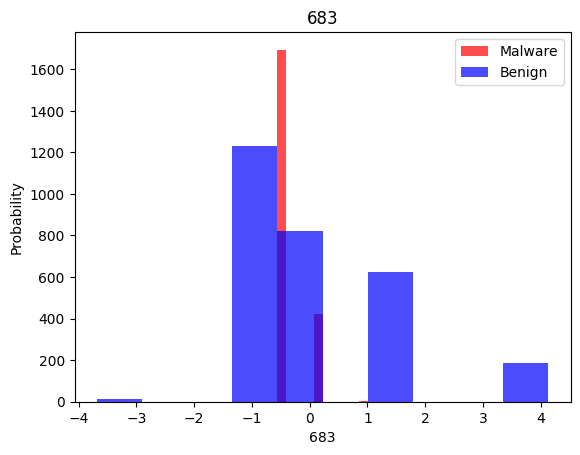

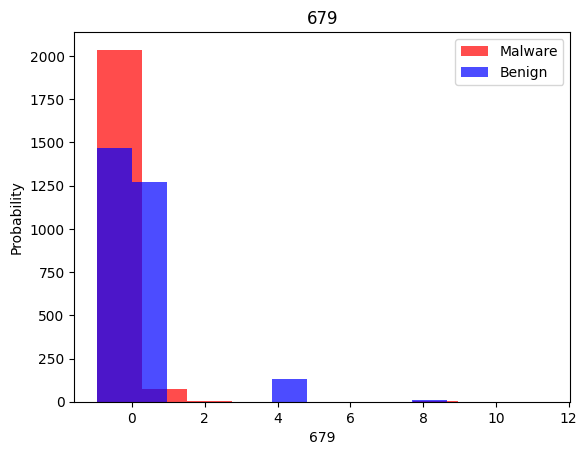

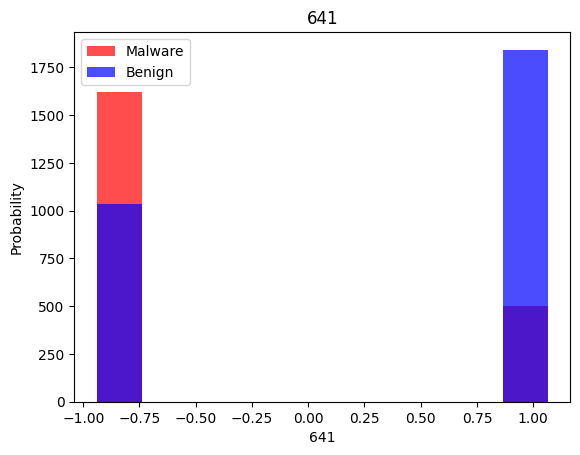

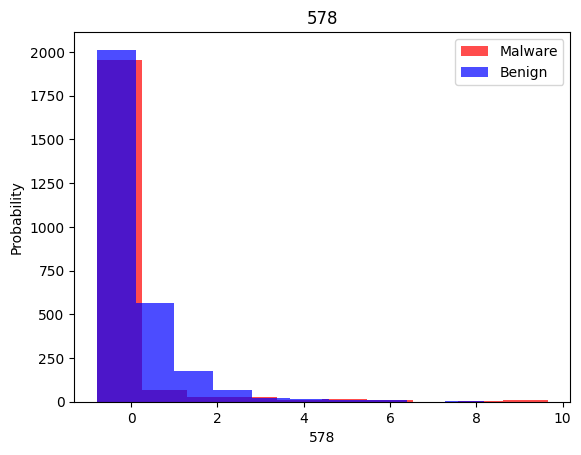

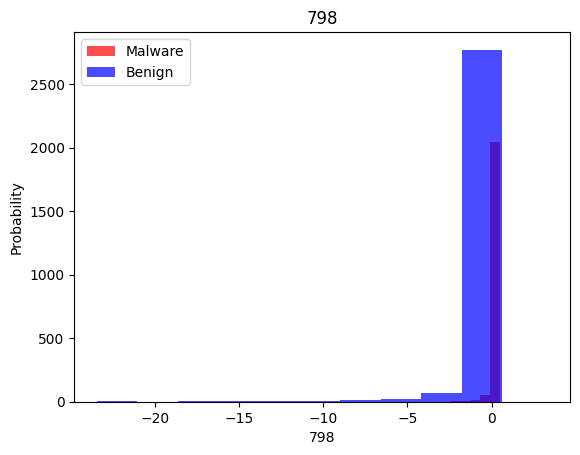

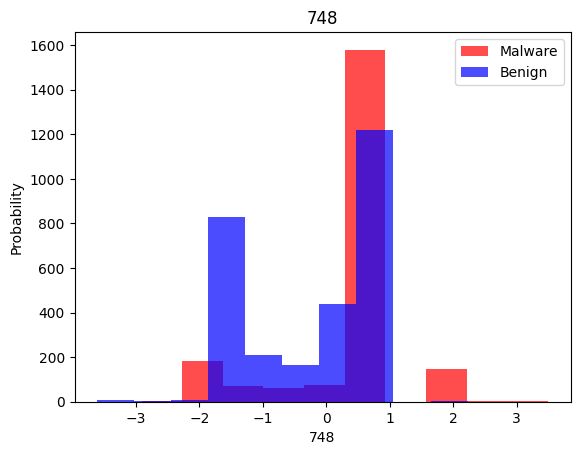

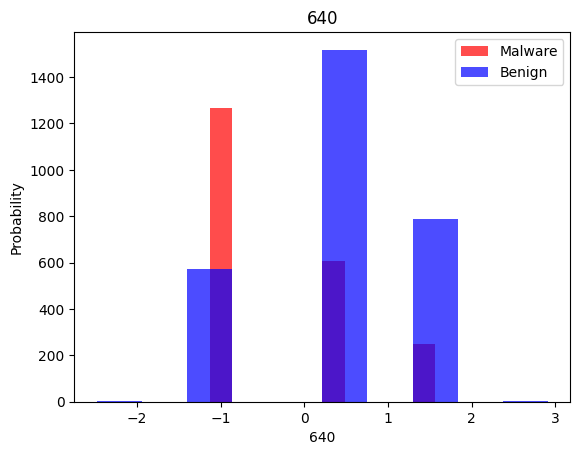

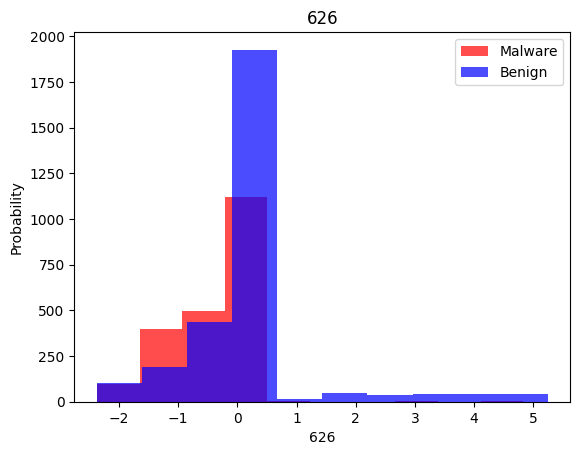

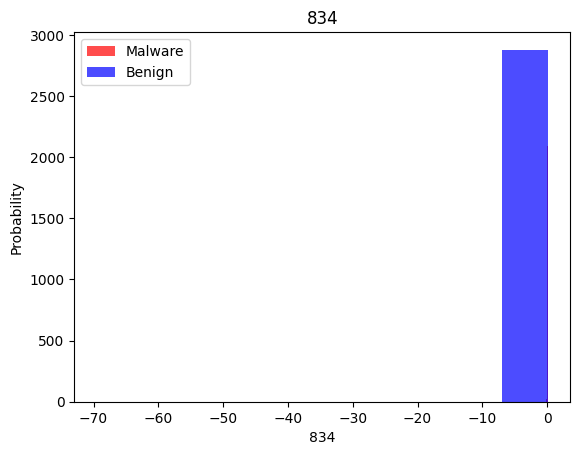

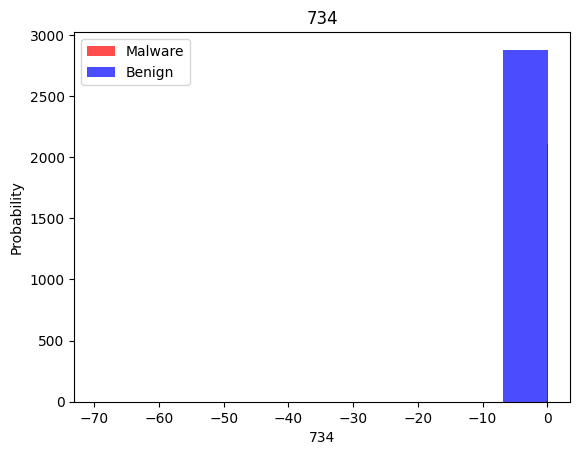

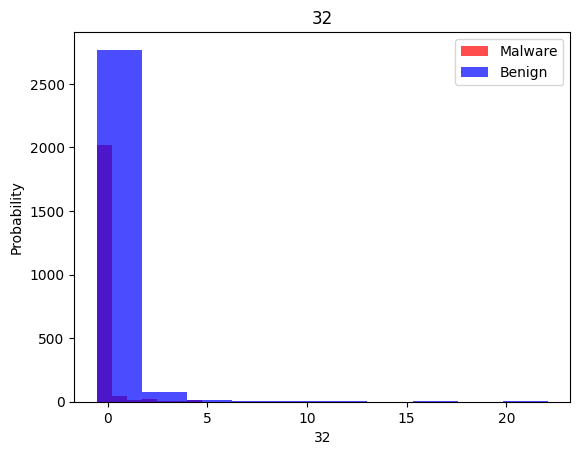

In [11]:
for feature in dataframe.columns[1:-1]:
    plt.hist(dataframe[dataframe["is_malicious"]==True][feature],color="red",label="Malware",alpha=0.7)
    plt.hist(dataframe[dataframe["is_malicious"]==False][feature],color="blue",label="Benign",alpha=0.7)
    plt.title(feature)
    plt.ylabel("Probability")
    plt.xlabel(feature)
    plt.legend()
    plt.show()

#### Dataset setup

In [12]:
X = dataframe.iloc[:,1:-1]
y = dataframe.iloc[:,:1]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


#### Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
y_predicted = decision_tree_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))



              precision    recall  f1-score   support

           0       0.96      0.95      0.95       573
           1       0.93      0.95      0.94       427

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_predicted = logistic_model.predict(X_test)


#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       516
           1       0.96      0.86      0.91       484

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



#### Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier

neural_model = MLPClassifier()
neural_model.fit(X_train,y_train)
y_predicted = neural_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.94      0.95      0.95       434

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



#### Support Vector Classifier

In [24]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
y_predicted = svc_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       539
           1       0.95      0.89      0.92       461

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_predicted = rf_model.predict(X_test)

#Performance
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       577
           1       0.95      0.97      0.96       423

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



#### Stacking

In [26]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("decision tees",decision_tree_model),
    ("neural network ",neural_model),
    ("logistic Eregression",logistic_model),
    ("random forest",rf_model),
    ("svc",svc_model),
    
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_model.fit(X_train,y_train)
y_predicted = stacking_model.predict(X_test)
print(classification_report(y_predicted, y_test))





              precision    recall  f1-score   support

           0       0.98      0.96      0.97       575
           1       0.95      0.97      0.96       425

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



#### Exporting Classifier

In [27]:
import pickle

with open("../../Model/classifier.pkl","wb") as f:
    pickle.dump(stacking_model,f)